In [2]:
##work with the filtered last 5 years csv file
## 0) Setup: imports you'll need
import csv, pandas as pd
from pathlib import Path
from IPython.display import display

## 1) Point to your file b
FILE = "/Users/xavier/Documents/Masters Y1S2/BAP Project/checkin_last5years.csv"

p = Path(FILE)
assert p.exists(), f"File not found. If this fails, double-check the path:\n{p}"


In [3]:

# 2) Basic info
size_mb = p.stat().st_size / (1024**2)
print(f"File: {p.name}")
print(f"Path: {p}")
print(f"Approx size: {size_mb:,.1f} MB")

# 3) Detect delimiter from a small text sample
with open(p, "r", encoding="utf-8", errors="replace", newline="") as f:
    sample_text = f.read(2_000_000)  # ~2MB
    try:
        delimiter = csv.Sniffer().sniff(sample_text).delimiter
    except Exception:
        delimiter = ","
print(f"Detected delimiter: {repr(delimiter)}")

# 4) LOAD a sample into `df`  <<< this is the step that was missing
NROWS = 100_000  # lower to 50_000 if your laptop is slow
last_err = None
for enc in ["utf-8", "latin1"]:   # try utf-8 first, then latin1
    try:
        df = pd.read_csv(p, sep=delimiter, nrows=NROWS, low_memory=False, encoding=enc)
        used_encoding = enc
        break
    except Exception as e:
        last_err = e
else:
    raise RuntimeError(f"Could not read sample. Last error:\n{last_err}")

print(f"\nLoaded sample rows: {len(df):,}  (encoding={used_encoding})")
print(f"Columns ({len(df.columns)}): {list(df.columns)}")

# 5) Schema (non-null counts + dtypes)
schema = (
    pd.DataFrame({
        "non_nulls": df.notna().sum(),
        "dtype": df.dtypes.astype(str)
    })
    .reset_index(names="column")
    .sort_values("column")
)
print("\n=== Schema (sample) ===")
display(schema)

# 6) Peek at data
print("\n=== FIRST 50 ROWS ===")
display(df.head(50))
print("\n=== LAST 50 ROWS ===")
display(df.tail(50))

# 7) Date/time columns (best guess by name), show ranges
def looks_datetime(name: str) -> bool:
    name = name.lower()
    return any(k in name for k in ["date", "time", "timestamp", "checkin", "checked"])

date_cols = [c for c in df.columns if looks_datetime(c)]
if date_cols:
    print("\n=== Date/Time columns (sampled) ===")
    for c in date_cols:
        try:
            s = pd.to_datetime(df[c], errors="coerce", utc=True, infer_datetime_format=True)
            if s.notna().any():
                print(f"• {c}: min={s.min()} | max={s.max()} | non_null={int(s.notna().sum()):,}")
        except Exception:
            pass

# 8) Likely ID columns
id_cols = [c for c in df.columns if "id" in c.lower()]
if id_cols:
    print("\n=== Likely ID columns (unique counts in sample) ===")
    for c in id_cols:
        try:
            print(f"• {c}: unique={df[c].nunique():,}")
        except Exception:
            pass

# 9) Save a short text summary alongside the CSV
summary_lines = [
    f"File: {p.name}",
    f"Size: {size_mb:,.1f} MB",
    f"Detected delimiter: {repr(delimiter)}",
    f"Loaded sample rows: {len(df):,}",
    f"Columns ({len(df.columns)}): {list(df.columns)}"
]
if date_cols:
    summary_lines.append("Date/Time columns (sampled):")
    for c in date_cols:
        try:
            s = pd.to_datetime(df[c], errors="coerce", utc=True, infer_datetime_format=True)
            if s.notna().any():
                summary_lines.append(
                    f"  • {c}: min={s.min()} | max={s.max()} | non_null={int(s.notna().sum()):,}"
                )
        except Exception:
            pass
if id_cols:
    summary_lines.append("ID columns uniqueness (sampled):")
    for c in id_cols:
        try:
            summary_lines.append(f"  • {c}: unique={df[c].nunique():,}")
        except Exception:
            pass

summary_path = p.with_suffix(".profile.txt")
with open(summary_path, "w", encoding="utf-8") as out:
    out.write("\n".join(summary_lines))
print(f"\nSaved a short summary file here:\n{summary_path}")


File: checkin_last5years.csv
Path: /Users/xavier/Documents/Masters Y1S2/BAP Project/checkin_last5years.csv
Approx size: 208.3 MB
Detected delimiter: ','

Loaded sample rows: 100,000  (encoding=utf-8)
Columns (5): ['business_id', 'date', 'year', 'date_only', 'time_only']

=== Schema (sample) ===


,column,non_nulls,dtype
0,business_id,100000,object
1,date,100000,object
3,date_only,100000,object
4,time_only,100000,object
2,year,100000,int64



=== FIRST 50 ROWS ===


,business_id,date,year,date_only,time_only
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13T21:10:56Z,2020,2020-03-13,21:10:56
1,---kPU91CF4Lq2-WlRu9Lw,2020-06-02T22:18:06Z,2020,2020-06-02,22:18:06
2,---kPU91CF4Lq2-WlRu9Lw,2020-07-24T22:42:27Z,2020,2020-07-24,22:42:27
3,---kPU91CF4Lq2-WlRu9Lw,2020-10-24T21:36:13Z,2020,2020-10-24,21:36:13
4,---kPU91CF4Lq2-WlRu9Lw,2020-12-09T21:23:33Z,2020,2020-12-09,21:23:33
5,---kPU91CF4Lq2-WlRu9Lw,2021-01-20T17:34:57Z,2021,2021-01-20,17:34:57
6,---kPU91CF4Lq2-WlRu9Lw,2021-04-30T21:02:03Z,2021,2021-04-30,21:02:03
7,---kPU91CF4Lq2-WlRu9Lw,2021-05-25T21:16:54Z,2021,2021-05-25,21:16:54
8,---kPU91CF4Lq2-WlRu9Lw,2021-08-06T21:08:08Z,2021,2021-08-06,21:08:08
9,---kPU91CF4Lq2-WlRu9Lw,2021-10-02T15:15:42Z,2021,2021-10-02,15:15:42



=== LAST 50 ROWS ===


,business_id,date,year,date_only,time_only
99950,0iEZSvu05E18sUHg2e4MXQ,2020-06-20T12:59:59Z,2020,2020-06-20,12:59:59
99951,0iEZSvu05E18sUHg2e4MXQ,2020-06-24T20:49:20Z,2020,2020-06-24,20:49:20
99952,0iEZSvu05E18sUHg2e4MXQ,2020-07-17T20:54:02Z,2020,2020-07-17,20:54:02
99953,0iEZSvu05E18sUHg2e4MXQ,2020-07-18T12:38:41Z,2020,2020-07-18,12:38:41
99954,0iEZSvu05E18sUHg2e4MXQ,2020-07-20T20:50:59Z,2020,2020-07-20,20:50:59
99955,0iEZSvu05E18sUHg2e4MXQ,2020-07-21T22:24:24Z,2020,2020-07-21,22:24:24
99956,0iEZSvu05E18sUHg2e4MXQ,2020-07-23T20:46:39Z,2020,2020-07-23,20:46:39
99957,0iEZSvu05E18sUHg2e4MXQ,2020-07-28T21:10:25Z,2020,2020-07-28,21:10:25
99958,0iEZSvu05E18sUHg2e4MXQ,2020-08-01T13:15:29Z,2020,2020-08-01,13:15:29
99959,0iEZSvu05E18sUHg2e4MXQ,2020-08-05T20:38:43Z,2020,2020-08-05,20:38:43



=== Date/Time columns (sampled) ===
• date: min=2018-01-01 00:04:23+00:00 | max=2022-01-19 16:35:37+00:00 | non_null=100,000
• date_only: min=2018-01-01 00:00:00+00:00 | max=2022-01-19 00:00:00+00:00 | non_null=100,000


/var/folders/xt/vjkjzbls22j5j5rdbgbg45480000gn/T/ipykernel_32919/771985240.py:60: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s = pd.to_datetime(df[c], errors="coerce", utc=True, infer_datetime_format=True)
/var/folders/xt/vjkjzbls22j5j5rdbgbg45480000gn/T/ipykernel_32919/771985240.py:60: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s = pd.to_datetime(df[c], errors="coerce", utc=True, infer_datetime_format=True)
/var/folders/xt/vjkjzbls22j5j5rdbgbg45480000gn/T/ipykernel_32919/771985240.py:60: UserWarning: The argument 'infer_datetime_format' is deprecate

• time_only: min=2025-09-03 00:00:00+00:00 | max=2025-09-03 23:59:59+00:00 | non_null=100,000

=== Likely ID columns (unique counts in sample) ===
• business_id: unique=2,636


/var/folders/xt/vjkjzbls22j5j5rdbgbg45480000gn/T/ipykernel_32919/771985240.py:88: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s = pd.to_datetime(df[c], errors="coerce", utc=True, infer_datetime_format=True)
/var/folders/xt/vjkjzbls22j5j5rdbgbg45480000gn/T/ipykernel_32919/771985240.py:88: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s = pd.to_datetime(df[c], errors="coerce", utc=True, infer_datetime_format=True)
/var/folders/xt/vjkjzbls22j5j5rdbgbg45480000gn/T/ipykernel_32919/771985240.py:88: UserWarning: The argument 'infer_datetime_format' is deprecate


Saved a short summary file here:
/Users/xavier/Documents/Masters Y1S2/BAP Project/checkin_last5years.profile.txt


In [4]:
##In the profiler cell, df held only a sample of 100,000 rows so it was fast to peek.
##now lets load the whole csv into df

import pandas as pd
from pathlib import Path

# Your path
FILE = "/Users/xavier/Documents/Masters Y1S2/BAP Project/checkin_last5years.csv"

# Only keep useful columns (drop date_only/time_only—they’re redundant)
usecols = ["business_id", "date", "year"]
dtypes  = {"business_id": "string", "year": "Int16"}

# Load ALL rows (no nrows argument)
df = pd.read_csv(
    FILE,
    usecols=usecols,
    dtype=dtypes,
    parse_dates=["date"],    # parse the main timestamp column
    low_memory=True
)

# Helpful derived fields for time-based EDA
df["date_only"] = df["date"].dt.date
df["hour"] = df["date"].dt.hour
df["dow"]  = df["date"].dt.day_name()

# Quick sanity info
print("Rows:", len(df))
print("Columns:", list(df.columns))
print("Time range:", df["date"].min(), "→", df["date"].max())
print("Unique businesses:", df["business_id"].nunique())
print("Memory ~MB:", round(df.memory_usage(deep=True).sum() / 1024**2, 2))


Rows: 3164991
Columns: ['business_id', 'date', 'year', 'date_only', 'hour', 'dow']
Time range: 2018-01-01 00:00:09+00:00 → 2022-01-19 16:48:37+00:00
Unique businesses: 95999
Memory ~MB: 549.67


In [5]:
df.head()           # Show the first 5 rows
df.shape            # Show (rows, columns)
df.columns          # List column names
df.info()           # Overview of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164991 entries, 0 to 3164990
Data columns (total 6 columns):
 #   Column       Dtype              
---  ------       -----              
 0   business_id  string             
 1   date         datetime64[ns, UTC]
 2   year         Int16              
 3   date_only    object             
 4   hour         int32              
 5   dow          object             
dtypes: Int16(1), datetime64[ns, UTC](1), int32(1), object(2), string(1)
memory usage: 117.7+ MB


In [6]:
#load only the relevant business IDs that are restaurants related
daniel = pd.read_json(
    "/Users/xavier/Documents/Masters Y1S2/BAP Project/yelp_academic_dataset_restaurants.json",
    lines=True
)


In [7]:
daniel.head()           # Show the first 5 rows
daniel.shape            # Show (rows, columns)
daniel.columns          # List column names
daniel.info()           # Overview of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52268 entries, 0 to 52267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52268 non-null  object 
 1   name          52268 non-null  object 
 2   address       52268 non-null  object 
 3   city          52268 non-null  object 
 4   state         52268 non-null  object 
 5   postal_code   52268 non-null  object 
 6   latitude      52268 non-null  float64
 7   longitude     52268 non-null  float64
 8   stars         52268 non-null  float64
 9   review_count  52268 non-null  int64  
 10  is_open       52268 non-null  int64  
 11  attributes    52268 non-null  object 
 12  categories    52268 non-null  object 
 13  hours         52268 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.6+ MB


In [8]:
# now to keep only the business ids that are in daniel's dataset
import pandas as pd

# Clean/align ID types
df["business_id"] = df["business_id"].astype("string").str.strip()
daniel["business_id"] = daniel["business_id"].astype("string").str.strip()

# Keep only check-ins whose business_id appears in daniel (semi-join)
keep_ids = pd.Index(daniel["business_id"]).dropna().unique()
checkins = df.loc[df["business_id"].isin(keep_ids)].copy()

# Light memory tidy (optional)
checkins["year"] = checkins["year"].astype("Int16")
checkins["hour"] = checkins["hour"].astype("Int8")
checkins["dow"]  = pd.Categorical(
    checkins["dow"],
    categories=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
    ordered=True
)

print("checkins filtered:", checkins.shape)
print("unique businesses kept:", checkins["business_id"].nunique())


checkins filtered: (2100624, 6)
unique businesses kept: 39409


In [9]:
#join business info now
cols_keep = ["business_id","name","city","state","stars","review_count","categories"]
joined = checkins.merge(daniel[cols_keep], on="business_id", how="left", validate="m:1")
joined.head()


,business_id,date,year,date_only,hour,dow,name,city,state,stars,review_count,categories
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56+00:00,2020,2020-03-13,21,Friday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
1,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06+00:00,2020,2020-06-02,22,Tuesday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
2,---kPU91CF4Lq2-WlRu9Lw,2020-07-24 22:42:27+00:00,2020,2020-07-24,22,Friday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
3,---kPU91CF4Lq2-WlRu9Lw,2020-10-24 21:36:13+00:00,2020,2020-10-24,21,Saturday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
4,---kPU91CF4Lq2-WlRu9Lw,2020-12-09 21:23:33+00:00,2020,2020-12-09,21,Wednesday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."


In [10]:
# Show columns
print("Number of columns:", len(joined.columns))
cols = joined.columns.tolist()
cols

Number of columns: 12


['business_id',
 'date',
 'year',
 'date_only',
 'hour',
 'dow',
 'name',
 'city',
 'state',
 'stars',
 'review_count',
 'categories']

In [11]:
joined.shape[0]      # number of rows
# or
len(joined)
# and if you want both dims:
joined.shape         # (rows, columns)


(2100624, 12)

In [12]:
#i realised some of the biz_ids in daniel dataset has 0 checkins and were left out.  
#Daniel's dataset had 52268 unique biz IDs but joined dataset only kept 39409 unique biz IDs.
# 12859 biz IDs had no checkins?
# how can these 12859 biz IDs still have stars / review_count but no checkins?
# lets check!!!

In [13]:
ids_dan = pd.Index(daniel["business_id"].astype("string").str.strip()).unique()
ids_df  = pd.Index(df["business_id"].astype("string").str.strip()).unique()

#Compute the set difference: business IDs that appear in daniel but not in df.
no_checkin_ids = ids_dan.difference(ids_df)
len(no_checkin_ids)  # should be 12859 ; it is!




12859

In [14]:
# See a few examples with their metadata
daniel[daniel["business_id"].isin(no_checkin_ids)].sample(5)[
    ["business_id","name","city","state","stars","review_count","categories"]
]

,business_id,name,city,state,stars,review_count,categories
29730,hlDkpi2AS8Fj8Azna9asRQ,Verona Pizza,Upper Darby,PA,4.0,13,"Pizza, Sandwiches, Burgers, Restaurants"
10964,mWuNP0irYEWpIoAcK12VqA,Lilly's Cocina Loca,Newtown,PA,3.0,21,"Mexican, Restaurants"
11826,tD7_JhXERoPS8NXCi7UiCg,Liz's HomeStyle Grill,Edmonton,AB,3.5,8,"Sandwiches, Restaurants"
12211,9lTtm4UUHDrDtv_BmXI8uA,The Original Brooklyn Water Bagel Co.,Tampa,FL,3.0,155,"Sandwiches, Coffee & Tea, Food, Bagels, Restau..."
46206,woF39W2-DHBbqKSabbCCCQ,Feast,Nashville,TN,3.0,37,"American (New), Food, Restaurants"


In [15]:
#so these 5 places should not be in df at all.
bid = "gEltZpDpY54boc3SaerMtg"
clean = lambda s: s.astype("string").str.strip()

# Presence checks
in_dan = clean(daniel["business_id"]).eq(bid).any()
in_df  = clean(df["business_id"]).eq(bid).any()
print("In daniel:", in_dan, " | In df:", in_df)   # df should be False

# Show the business metadata (from daniel)
daniel.loc[clean(daniel["business_id"]).eq(bid),
           ["business_id","name","city","state","stars","review_count","categories"]]

# If you still want to double-check df rows (should be empty)
df.loc[clean(df["business_id"]).eq(bid), ["business_id","date","year","hour","dow"]]


In daniel: True  | In df: False


,business_id,date,year,hour,dow


In [16]:
bid = "oW8dGLAvYu7ZK4OC9qdQUg"
clean = lambda s: s.astype("string").str.strip()

# Presence checks
in_dan = clean(daniel["business_id"]).eq(bid).any()
in_df  = clean(df["business_id"]).eq(bid).any()
print("In daniel:", in_dan, " | In df:", in_df)   # df should be False

# Show the business metadata (from daniel)
daniel.loc[clean(daniel["business_id"]).eq(bid),
           ["business_id","name","city","state","stars","review_count","categories"]]

# If you still want to double-check df rows (should be empty)
df.loc[clean(df["business_id"]).eq(bid), ["business_id","date","year","hour","dow"]]


In daniel: True  | In df: False


,business_id,date,year,hour,dow


In [17]:
## Yelp: Reviews vs Check-Ins
## - Reviews/ratings are independent of check-ins.
## - A user can leave a star rating + review without tapping the “Check In” button.
## - Check-ins are an optional social “I’m here” action (sometimes tied to offers).
## - Therefore, some businesses have stars/review_count but 0 check-ins in the 2018–2022 check-in table.b

In [18]:
#joined dataset should have 39409 unique business IDs
clean = lambda s: s.astype("string").str.strip()

ids_joined = joined["business_id"].nunique()

ids_df  = pd.Index(clean(df["business_id"]).unique())
ids_dan = pd.Index(clean(daniel["business_id"]).unique())
ids_intersection = ids_df.intersection(ids_dan).nunique()

print("unique business_id in joined:", ids_joined)
print("intersection(df, daniel):     ", ids_intersection)


unique business_id in joined: 39409
intersection(df, daniel):      39409


In [19]:
# there are 39409 unique business IDs
# joined dataset has 2100624 rows
# A business_id that appears more times has more check-ins (busier)

In [20]:
# Total check-ins per business (descending)
checks_per_biz = joined["business_id"].value_counts()
checks_per_biz.head(10)


business_id
FEXhWNCMkv22qG04E83Qjg    9284
ac1AeYqs8Z4_e2X5M3if2A    8773
VQcCL9PiNL_wkGf-uF3fjg    7036
_ab50qdWOk0DdB6XOrBitw    3792
ytynqOUb3hjKeJfRj5Tshw    3755
qb28j-FNX1_6xm7u372TZA    3326
oBNrLz4EDhiscSlbOl8uAw    3221
GXFMD0Z4jEVZBCsbPf4CTQ    2690
BbnL_wJLB-EHvFx0dXuAjg    2668
l4IeGBHXV2E8S8COd9rx9A    2574
Name: count, dtype: Int64

In [21]:
# last 10 (smallest counts)
checks_per_biz.tail(10)


business_id
Qsoq2TGOe59LZy7z6KbQjA    1
QtoVPZ_0pss7tTDR-bApow    1
qAWWksz_hTUJ_SlUHuhUNw    1
D-QT7vrSHLphXEU5OP6dGg    1
QehLpDI-ZdJJLu5dobDdxg    1
DKQfrG2Z9x9sPY6J2-B15g    1
q-ELRv_Q3x2rH4zawcG7kg    1
DKXRiU1cERDSZmBXEeCOjA    1
QY9h6QIaBFeExPGNPqiOMg    1
zznZqH9CiAznbkV6fXyHWA    1
Name: count, dtype: Int64

In [22]:
#per business counts
import numpy as np, pandas as pd

# one row = one check-in; count per business
checks_per_biz = joined["business_id"].value_counts().astype("int64")
n_biz   = checks_per_biz.size
total   = checks_per_biz.sum()

print("Businesses:", n_biz, "| Total check-ins:", total, "| Avg per biz:", round(total/n_biz, 2))
checks_per_biz.describe(percentiles=[.5,.9,.95,.99,.999])


Businesses: 39409 | Total check-ins: 2100624 | Avg per biz: 53.3


count    39409.000000
mean        53.303154
std        141.626999
min          1.000000
50%         17.000000
90%        129.000000
95%        211.000000
99%        528.000000
99.9%     1536.744000
max       9284.000000
Name: count, dtype: float64

In [23]:
# quite heavy-tailed (median 17, top 1% ≥ ~528, max 9,284)

In [24]:
#Top 10% of businesses account for ~57% of all check-ins
#Top 20% → ~74%
#Top 50% → ~94%
# heavy-tail

In [25]:
len(joined), joined["business_id"].nunique()


(2100624, 39409)

In [29]:
import pandas as pd

def top_share_table(checks, percents=[0.01, 0.05, 0.10, 0.20, 0.50]):
    n = checks.size
    total = checks.sum()
    rows = []
    for p in percents:
        k = max(1, int(round(n * p)))
        share = checks.iloc[:k].sum() / total
        rows.append({
            "Top %": f"{int(p*100)}%",
            "Businesses (k)": k,
            "Share of check-ins": f"{share:.2%}"
        })
    return pd.DataFrame(rows)

table = top_share_table(checks_per_biz)
display(table)


,Top %,Businesses (k),Share of check-ins
0,1%,394,18.16%
1,5%,1970,41.59%
2,10%,3941,56.97%
3,20%,7882,74.34%
4,50%,19704,94.11%


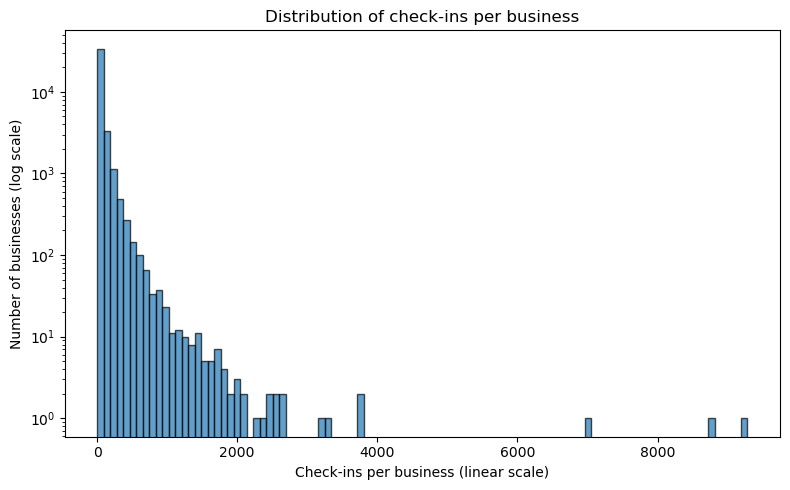

In [31]:
plt.figure(figsize=(8,5))
plt.hist(counts, bins=100, edgecolor="black", alpha=0.7)
plt.yscale("log")
plt.xlabel("Check-ins per business (linear scale)")
plt.ylabel("Number of businesses (log scale)")
plt.title("Distribution of check-ins per business")
plt.tight_layout()



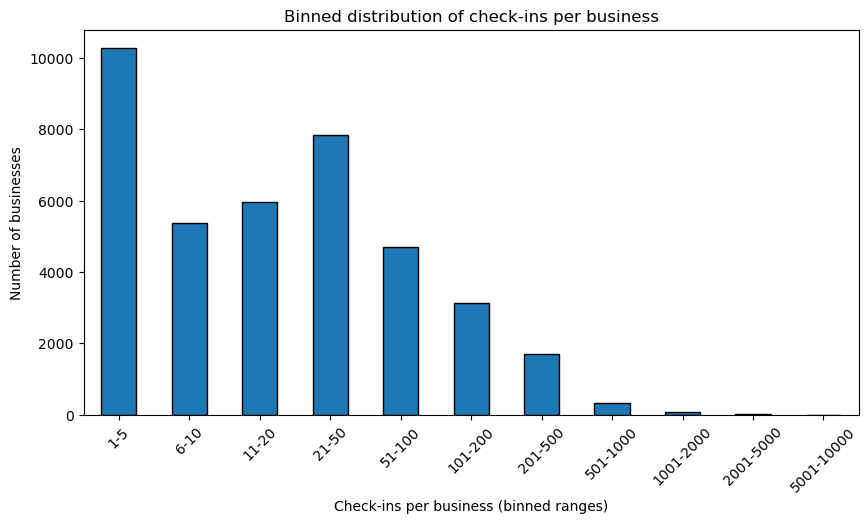

In [33]:
import pandas as pd

bins = [0, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
labels = [f"{bins[i]+1}-{bins[i+1]}" for i in range(len(bins)-1)]

binned = pd.cut(checks_per_biz.values, bins=bins, labels=labels, right=True, include_lowest=True)
bin_counts = binned.value_counts().sort_index()

bin_counts.plot(kind="bar", figsize=(10,5), edgecolor="black")
plt.ylabel("Number of businesses")
plt.xlabel("Check-ins per business (binned ranges)")
plt.title("Binned distribution of check-ins per business")
plt.xticks(rotation=45)
plt.show()


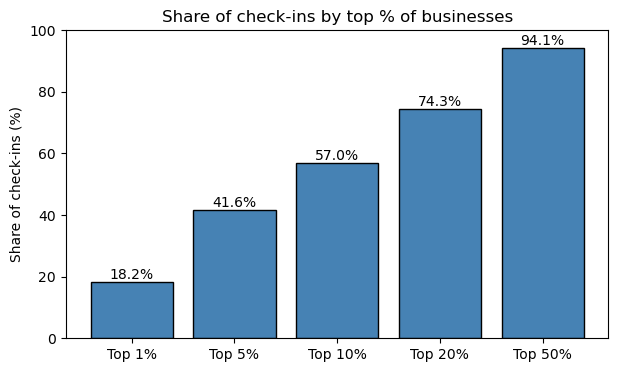

In [34]:
import matplotlib.pyplot as plt

top_shares = {
    "Top 1%": 18.16,
    "Top 5%": 41.59,
    "Top 10%": 56.97,
    "Top 20%": 74.34,
    "Top 50%": 94.11
}

plt.figure(figsize=(7,4))
plt.bar(top_shares.keys(), top_shares.values(), color="steelblue", edgecolor="black")
plt.ylabel("Share of check-ins (%)")
plt.title("Share of check-ins by top % of businesses")
plt.ylim(0,100)

for i,(k,v) in enumerate(top_shares.items()):
    plt.text(i, v+1, f"{v:.1f}%", ha="center")

plt.show()


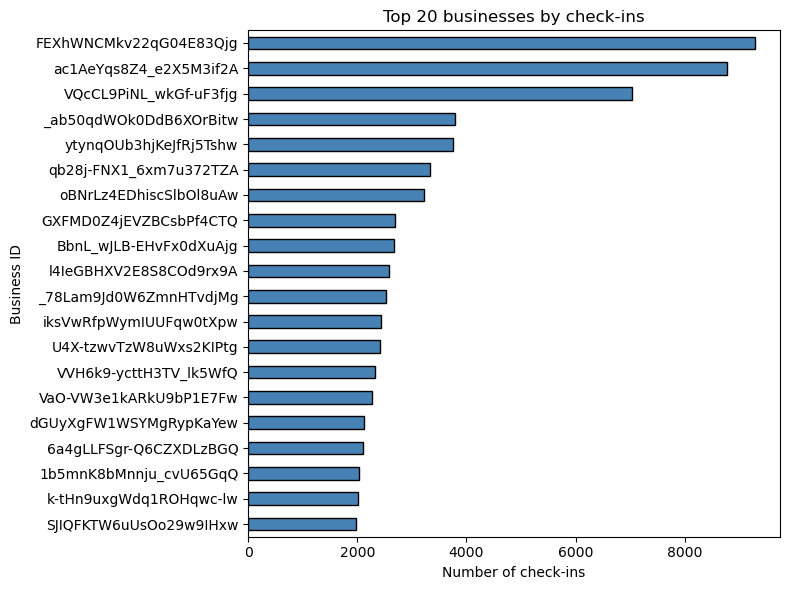

In [35]:
# Get top 20 businesses by check-in count
top20 = checks_per_biz.head(20)

# Plot as horizontal bar chart
plt.figure(figsize=(8,6))
top20.sort_values().plot(kind="barh", color="steelblue", edgecolor="black")

plt.xlabel("Number of check-ins")
plt.ylabel("Business ID")
plt.title("Top 20 businesses by check-ins")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

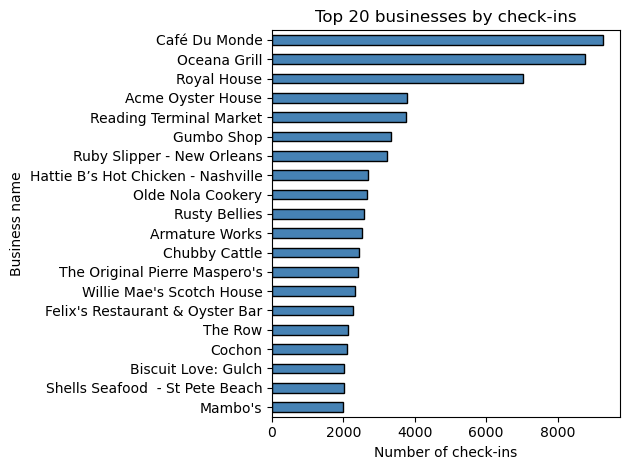

In [36]:
# Get top 20 businesses by check-in count
top20 = checks_per_biz.head(20).reset_index()
top20.columns = ["business_id", "checkins"]

# Merge with original dataframe to get business names
# (adjust column name if it's not exactly "name" in your data)
top20 = top20.merge(joined[["business_id", "name"]].drop_duplicates(),
                    on="business_id", how="left")

# Plot with business names instead of IDs
plt.figure(figsize=(10,6))
top20.sort_values("checkins").plot(
    kind="barh",
    x="name",
    y="checkins",
    legend=False,
    color="steelblue",
    edgecolor="black"
)

plt.xlabel("Number of check-ins")
plt.ylabel("Business name")
plt.title("Top 20 businesses by check-ins")
plt.tight_layout()
plt.show()


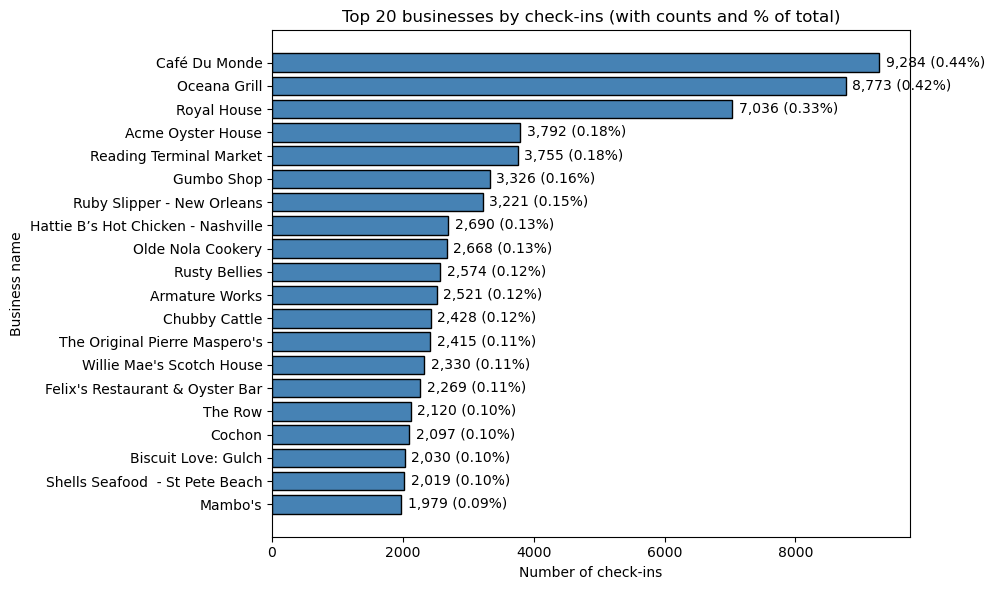

In [39]:
# Sort ascending so largest ends up on top in the horizontal plot
top20_sorted = top20.sort_values("checkins", ascending=True)

plt.figure(figsize=(10,6))
bars = plt.barh(top20_sorted["name"], top20_sorted["checkins"],
                color="steelblue", edgecolor="black")

# Add count + % labels
for bar, (count, pct) in zip(bars, zip(top20_sorted["checkins"], top20_sorted["percent"])):
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f"{count:,} ({pct:.2f}%)", va="center")

plt.xlabel("Number of check-ins")
plt.ylabel("Business name")
plt.title("Top 20 businesses by check-ins (with counts and % of total)")
plt.tight_layout()
plt.show()


In [41]:
joined.columns


Index(['business_id', 'date', 'year', 'date_only', 'hour', 'dow', 'name',
       'city', 'state', 'stars', 'review_count', 'categories'],
      dtype='object')

In [42]:
joined.head(10)

,business_id,date,year,date_only,hour,dow,name,city,state,stars,review_count,categories
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56+00:00,2020,2020-03-13,21,Friday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
1,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06+00:00,2020,2020-06-02,22,Tuesday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
2,---kPU91CF4Lq2-WlRu9Lw,2020-07-24 22:42:27+00:00,2020,2020-07-24,22,Friday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
3,---kPU91CF4Lq2-WlRu9Lw,2020-10-24 21:36:13+00:00,2020,2020-10-24,21,Saturday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
4,---kPU91CF4Lq2-WlRu9Lw,2020-12-09 21:23:33+00:00,2020,2020-12-09,21,Wednesday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
5,---kPU91CF4Lq2-WlRu9Lw,2021-01-20 17:34:57+00:00,2021,2021-01-20,17,Wednesday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
6,---kPU91CF4Lq2-WlRu9Lw,2021-04-30 21:02:03+00:00,2021,2021-04-30,21,Friday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
7,---kPU91CF4Lq2-WlRu9Lw,2021-05-25 21:16:54+00:00,2021,2021-05-25,21,Tuesday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
8,---kPU91CF4Lq2-WlRu9Lw,2021-08-06 21:08:08+00:00,2021,2021-08-06,21,Friday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."
9,---kPU91CF4Lq2-WlRu9Lw,2021-10-02 15:15:42+00:00,2021,2021-10-02,15,Saturday,Frankie's Raw Bar,New Port Richey,FL,4.5,24,"Seafood, Restaurants, Latin American, Food, Fo..."


In [43]:
checkins_by_year = joined["year"].value_counts().sort_index()

print(checkins_by_year)


year
2018    771317
2019    692047
2020    304221
2021    318916
2022     14123
Name: count, dtype: Int64


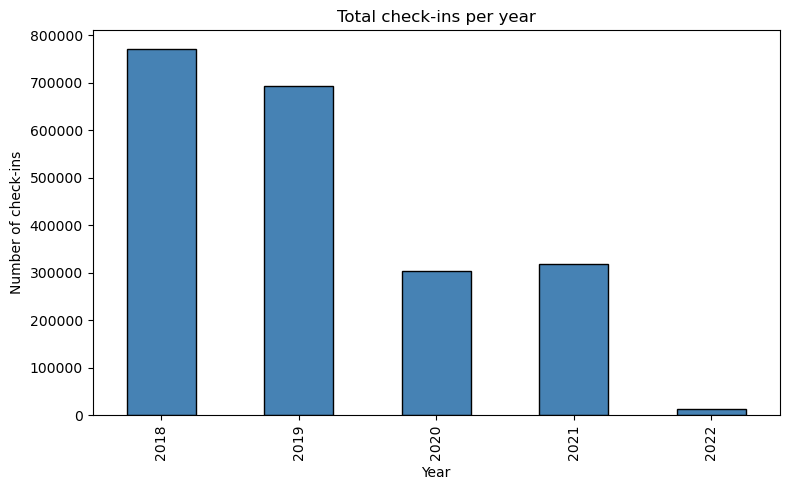

In [44]:
plt.figure(figsize=(8,5))
checkins_by_year.plot(kind="bar", color="steelblue", edgecolor="black")

plt.ylabel("Number of check-ins")
plt.xlabel("Year")
plt.title("Total check-ins per year")
plt.tight_layout()
plt.show()


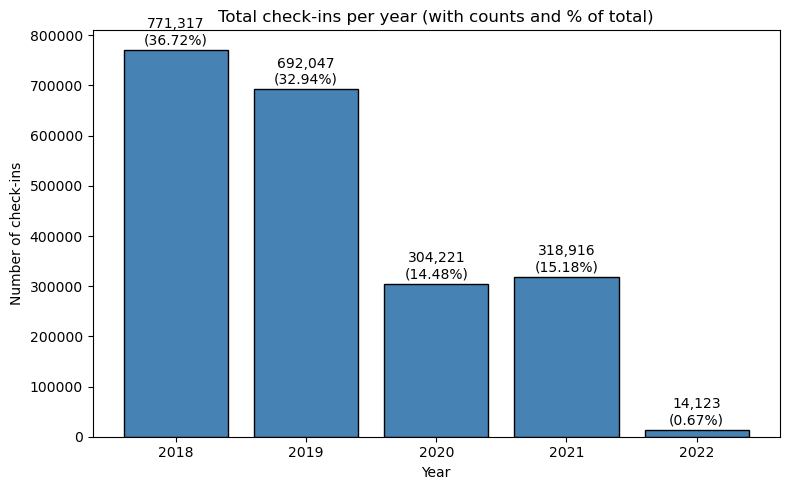

In [45]:
total_checkins = joined.shape[0]  # or 2100624
checkins_by_year = joined["year"].value_counts().sort_index()

plt.figure(figsize=(8,5))
bars = plt.bar(checkins_by_year.index, checkins_by_year.values,
               color="steelblue", edgecolor="black")

# Annotate each bar with count + %
for bar, count in zip(bars, checkins_by_year.values):
    pct = 100 * count / total_checkins
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
             f"{count:,}\n({pct:.2f}%)",
             ha="center", va="bottom")

plt.ylabel("Number of check-ins")
plt.xlabel("Year")
plt.title("Total check-ins per year (with counts and % of total)")
plt.tight_layout()
plt.show()


/var/folders/xt/vjkjzbls22j5j5rdbgbg45480000gn/T/ipykernel_32919/3206793356.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  joined["month"] = joined["date"].dt.to_period("M")


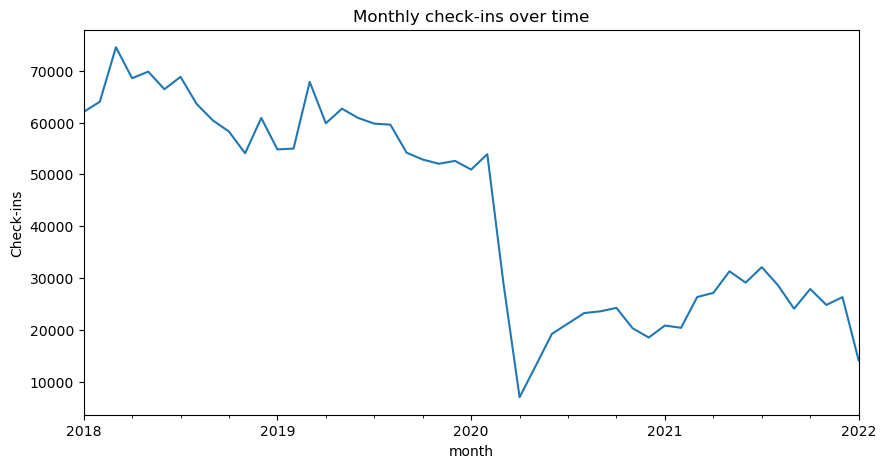

In [46]:
joined["month"] = joined["date"].dt.to_period("M")
checkins_by_month = joined["month"].value_counts().sort_index()

checkins_by_month.plot(kind="line", figsize=(10,5))
plt.ylabel("Check-ins")
plt.title("Monthly check-ins over time")
plt.show()


/var/folders/xt/vjkjzbls22j5j5rdbgbg45480000gn/T/ipykernel_32919/254571245.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  checkins_by_month = joined["date"].dt.to_period("M").value_counts().sort_index()


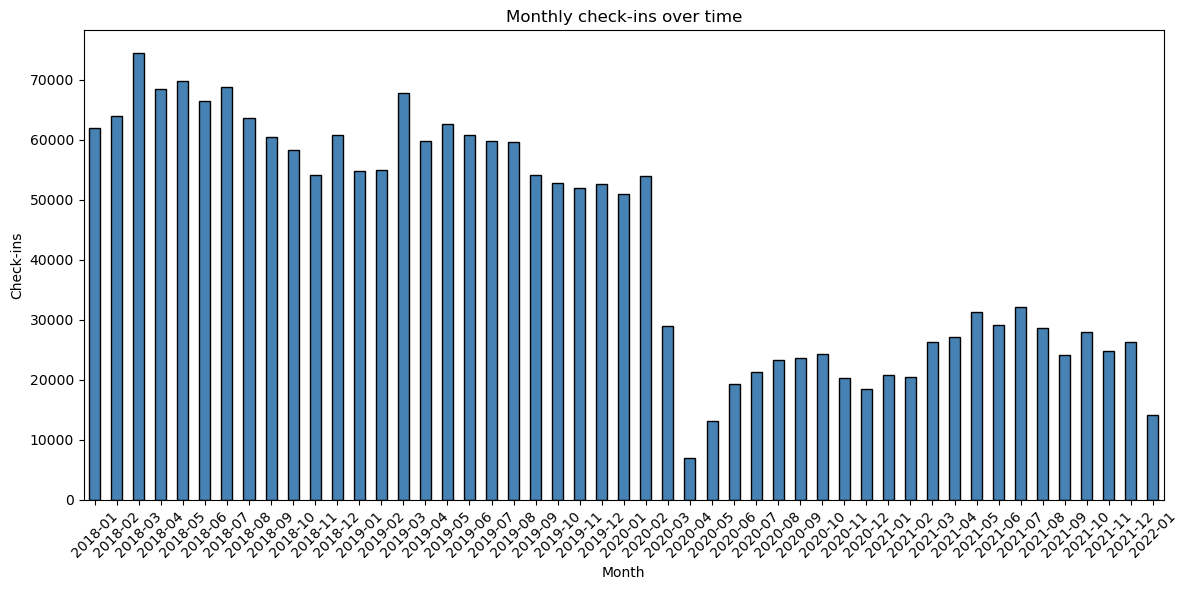

In [47]:
checkins_by_month = joined["date"].dt.to_period("M").value_counts().sort_index()

plt.figure(figsize=(12,6))
checkins_by_month.plot(kind="bar", color="steelblue", edgecolor="black")

plt.ylabel("Check-ins")
plt.xlabel("Month")
plt.title("Monthly check-ins over time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


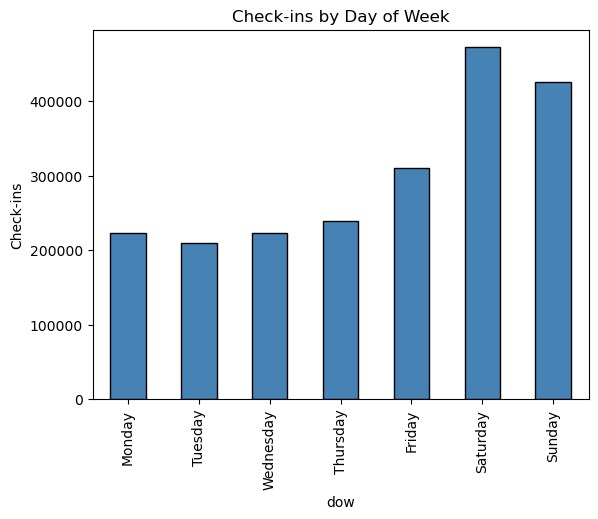

In [49]:
dow_counts = joined["dow"].value_counts()[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

dow_counts.plot(kind="bar", color="steelblue", edgecolor="black")
plt.ylabel("Check-ins")
plt.title("Check-ins by Day of Week")
plt.show()


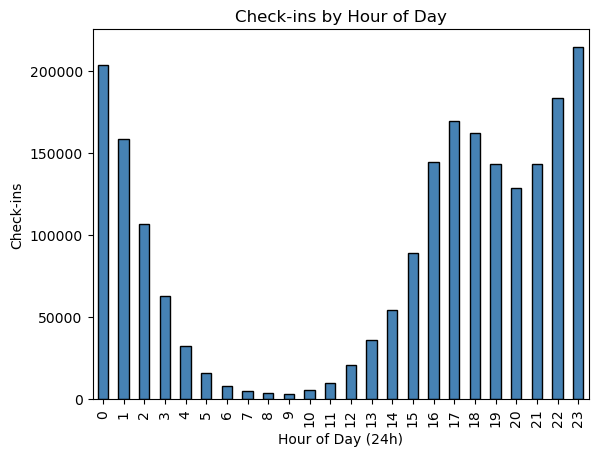

In [50]:
hour_counts = joined["hour"].value_counts().sort_index()

hour_counts.plot(kind="bar", color="steelblue", edgecolor="black")
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Check-ins")
plt.title("Check-ins by Hour of Day")
plt.show()
b

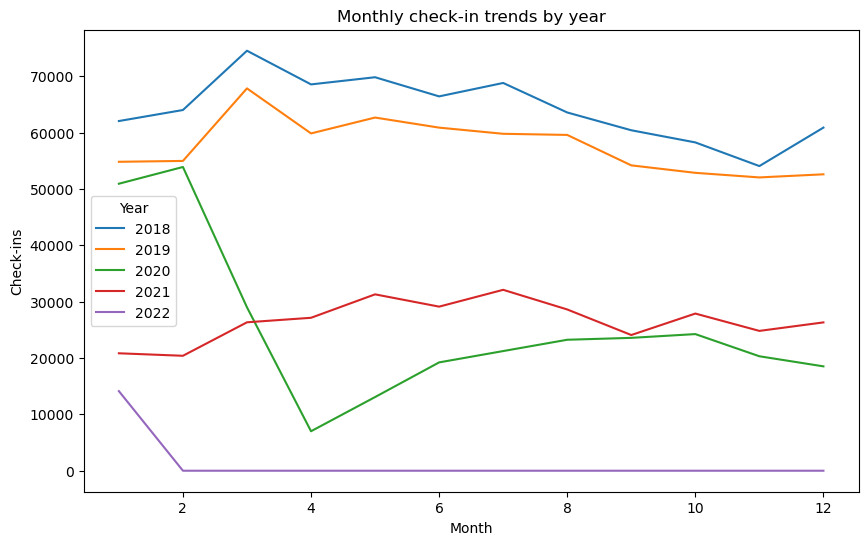

In [51]:
joined["month_num"] = joined["date"].dt.month
checkins_by_year_month = joined.groupby(["year","month_num"]).size().unstack(fill_value=0)

checkins_by_year_month.T.plot(figsize=(10,6))
plt.title("Monthly check-in trends by year")
plt.xlabel("Month")
plt.ylabel("Check-ins")
plt.legend(title="Year")
plt.show()



<Figure size 1000x600 with 0 Axes>

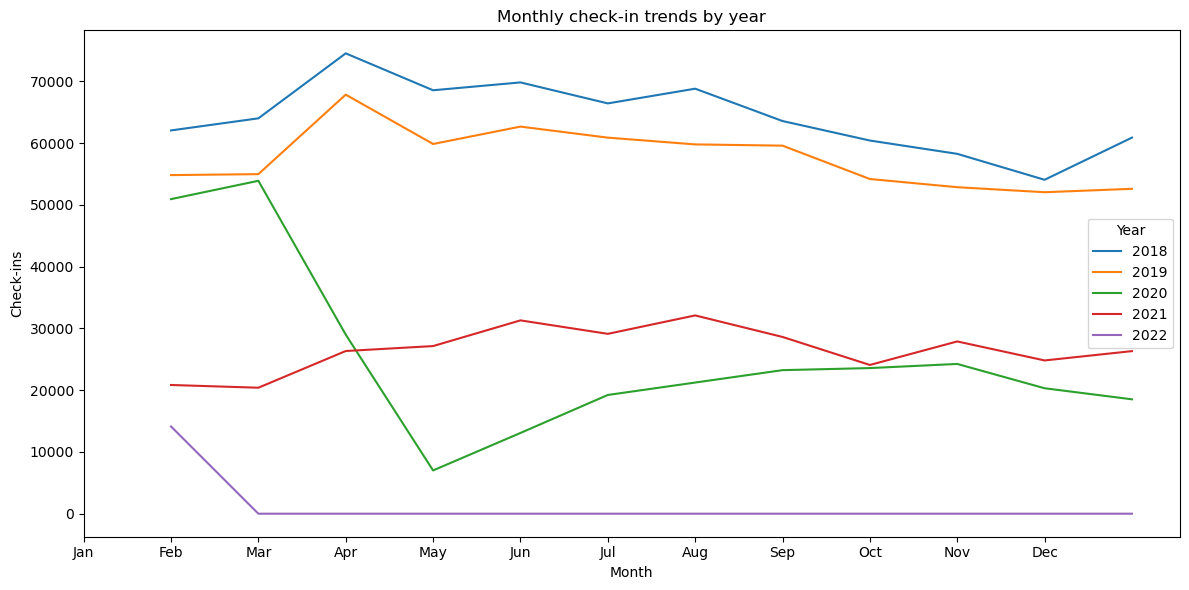

In [52]:
import calendar

# Replace month numbers with month names
plt.figure(figsize=(10,6))
checkins_by_year_month.T.plot(figsize=(12,6))

plt.title("Monthly check-in trends by year")
plt.xlabel("Month")
plt.ylabel("Check-ins")

# Relabel x-axis with month names
month_names = [calendar.month_abbr[m] for m in range(1,13)]
plt.xticks(ticks=range(12), labels=month_names)

plt.legend(title="Year")
plt.tight_layout()
plt.show()


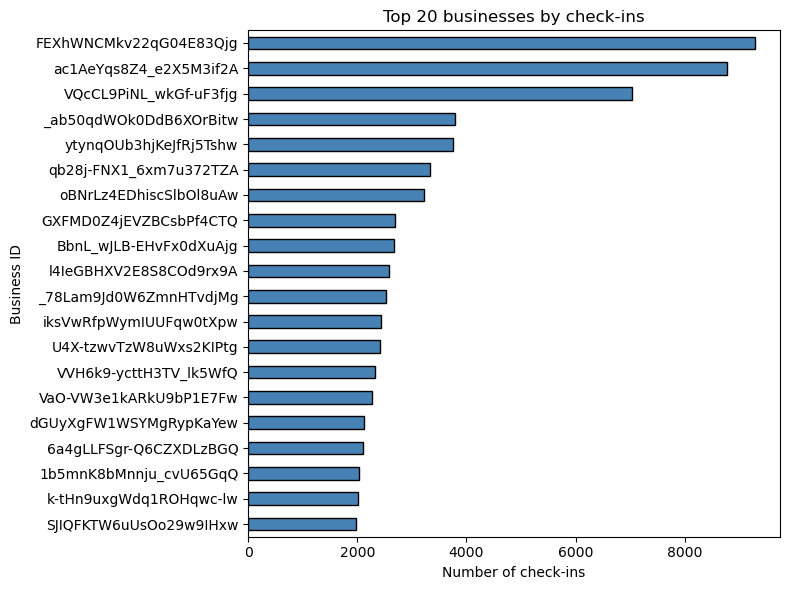

In [35]:
# Get top 20 businesses by check-in count
top20 = checks_per_biz.head(20)

# Plot as horizontal bar chart
plt.figure(figsize=(8,6))
top20.sort_values().plot(kind="barh", color="steelblue", edgecolor="black")

plt.xlabel("Number of check-ins")
plt.ylabel("Business ID")
plt.title("Top 20 businesses by check-ins")
plt.tight_layout()
plt.show()


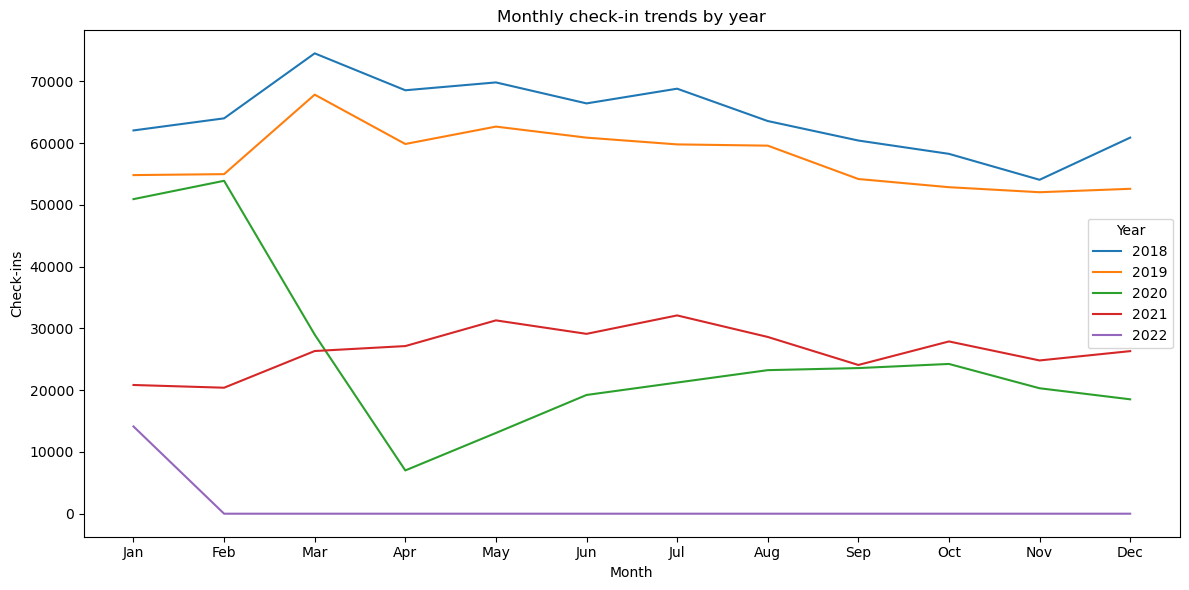

In [56]:
import calendar
import matplotlib.pyplot as plt

# Build a month (rows) × year (columns) table
monthly = (
    joined
    .assign(month_num=joined["date"].dt.month, year=joined["date"].dt.year)
    .groupby(["month_num","year"]).size()
    .unstack("year")                 # columns = years (2018, 2019, …)
    .reindex(index=range(1,13))      # force Jan..Dec rows in order
    .fillna(0)
)

# Plot on a single axes (avoid "0 Axes" issue)
fig, ax = plt.subplots(figsize=(12,6))
monthly.plot(ax=ax)

ax.set_title("Monthly check-in trends by year")
ax.set_xlabel("Month")
ax.set_ylabel("Check-ins")
ax.set_xticks(range(1,13), [calendar.month_abbr[i] for i in range(1,13)])
ax.legend(title="Year")
plt.tight_layout()
plt.show()
b

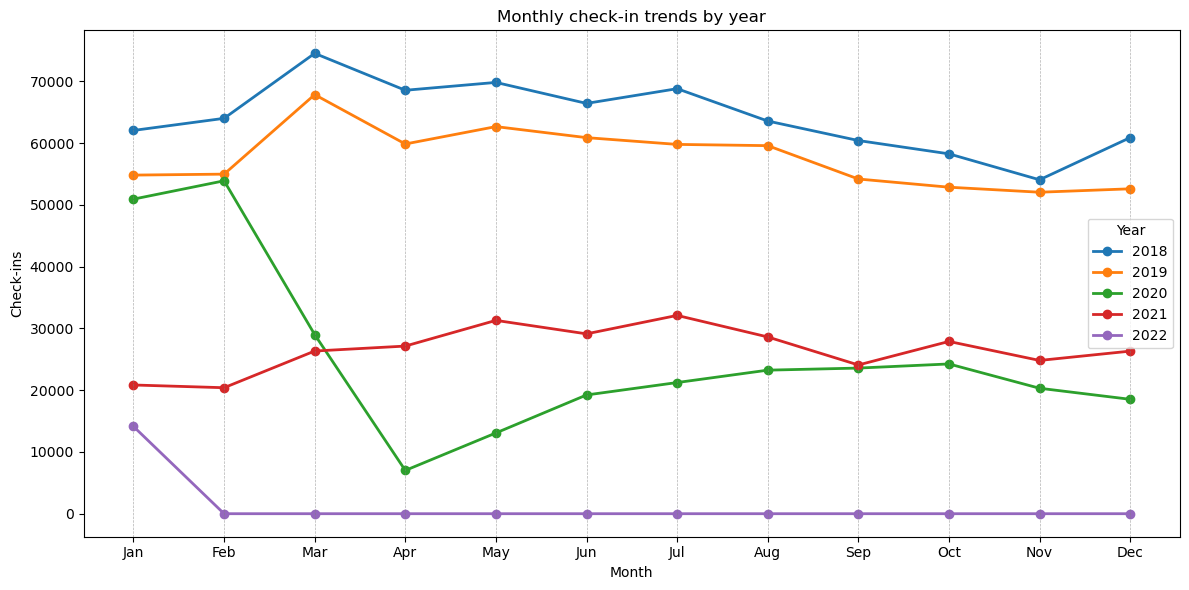

In [57]:
import calendar
import matplotlib.pyplot as plt

# Month (rows) × Year (columns) table
monthly = (
    joined
    .assign(month_num=joined["date"].dt.month, year=joined["date"].dt.year)
    .groupby(["month_num","year"]).size()
    .unstack("year")
    .reindex(index=range(1,13))      # Jan–Dec order
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(12,6))

# Plot with markers (dots)
monthly.plot(ax=ax, marker="o", linewidth=2)

# Add vertical dotted lines for each month
for m in range(1,13):
    ax.axvline(x=m, color="gray", linestyle="--", linewidth=0.5, alpha=0.6)

ax.set_title("Monthly check-in trends by year")
ax.set_xlabel("Month")
ax.set_ylabel("Check-ins")

# Proper month labels
ax.set_xticks(range(1,13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1,13)])

ax.legend(title="Year")
plt.tight_layout()
plt.show()


In [58]:
# Count how many months have nonzero check-ins per year
month_counts = (
    joined
    .groupby(["year", joined["date"].dt.month])
    .size()
    .reset_index(name="checkins")
    .groupby("year")["date"].nunique()
)

print(month_counts)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
year
2018    12
2019    12
2020    12
2021    12
2022     1
Name: date, dtype: int64


/var/folders/xt/vjkjzbls22j5j5rdbgbg45480000gn/T/ipykernel_32919/2836158936.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = joined.pivot_table(index="dow", columns="hour", values="business_id", aggfunc="count").fillna(0)


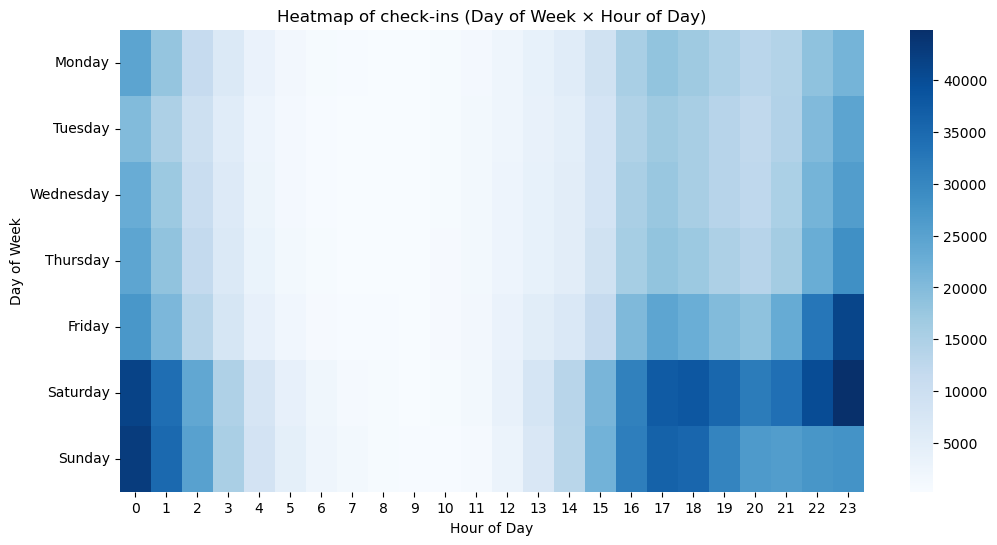

In [59]:
import seaborn as sns

pivot = joined.pivot_table(index="dow", columns="hour", values="business_id", aggfunc="count").fillna(0)
# Ensure days are ordered
pivot = pivot.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Blues")
plt.title("Heatmap of check-ins (Day of Week × Hour of Day)")
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.show()
